In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [3]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,72.254228,54.709999,39.112259
2014-01-03,72.016156,54.560001,39.022589
2014-01-06,71.613266,57.200001,39.128563
2014-01-07,71.833021,57.919998,39.576910
2014-01-08,71.265320,58.230000,39.723643


In [4]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2017-03-28,70.320000,141.759995,33.919998
2017-03-29,70.739998,142.649994,34.430000
2017-03-30,71.589996,142.410004,34.520000
2017-03-31,72.080002,142.050003,34.520000
2017-04-03,71.830002,142.279999,34.400002


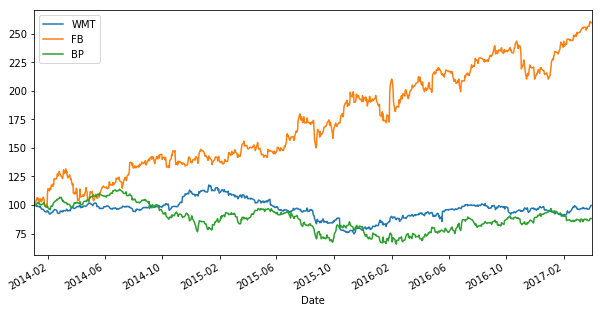

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

WMT   -0.001800
FB     0.292100
BP    -0.039236
dtype: float64

In [8]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.031595,0.008853,0.007041
FB,0.008853,0.083269,0.016707
BP,0.007041,0.016707,0.064737


In [9]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.172589,0.155688
FB,0.172589,1.000000,0.227552
BP,0.155688,0.227552,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

3

In [12]:
arr = np.random.random(2)
arr

array([ 0.69731879,  0.94501746])

In [13]:
arr[0] + arr[1]

1.6423362557286518

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.65862531,  0.11501333,  0.22636136])

In [16]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [17]:
np.sum(weights * log_returns.mean()) * 250

0.023528588737544966

Expected Portfolio Variance:

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.022434817498510985

Expected Portfolio Volatility:

In [19]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.14978256740525911

***

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.06906334957064586,
  0.08563395870336514,
  0.19266297674916752,
  0.12891632948031087,
  0.08449369633158325,
  0.10903159422744982,
  0.09318366018368938,
  0.1577576875302404,
  0.14667070542210792,
  0.022093975842261197,
  -0.0026593636068613755,
  0.053870495870457294,
  0.03752109433725383,
  0.011821403644026122,
  0.11340385324303337,
  0.12269029465755096,
  0.022044580136361916,
  0.11441400720240671,
  0.06490114854767738,
  0.052090122325764064,
  0.029207567164059634,
  0.05424381609594001,
  0.04909404825223992,
  -0.02070883777715067,
  0.008509910861289284,
  0.10335518438958927,
  0.12815899170466358,
  0.10342772957903587,
  0.08487081446160452,
  0.05131374629127724,
  0.1075896385524363,
  0.12194658489408383,
  0.09010230697458808,
  0.0559303246095601,
  0.11757237233778153,
  0.03144172905831168,
  0.12093937634314007,
  0.1109804203695338,
  0.06261947320058618,
  0.04439598023768145,
  0.10561569174161255,
  0.20198028745263208,
  0.06405587456473558,
  0.

In [30]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.21437383,  0.10487953,  0.11142841,  0.03325287,  0.21827227,
         0.23115708,  0.26164865,  0.15085056,  0.01446606,  0.14897914,
         0.12505813,  0.14276133,  0.23063296,  0.11540472,  0.16463936,
         0.22113845,  0.08659891,  0.14426081,  0.02020933,  0.18270794,
         0.17522637,  0.14694318,  0.0496073 ,  0.01515455,  0.07633162,
         0.18793073,  0.07759446,  0.18453809,  0.27843407,  0.10749431,
         0.12543211,  0.21566819,  0.04299372,  0.23403575,  0.14833239,
         0.15665431,  0.15771176,  0.24652813,  0.03486716,  0.1475755 ,
         0.10502862,  0.22736352,  0.14635438,  0.01055837,  0.0082901 ,
         0.19474067,  0.22739482,  0.07261825,  0.18206568,  0.2061096 ,
         0.18130838,  0.15545013,  0.17517466,  0.13683969,  0.13998962,
         0.15002686,  0.05096514,  0.12971907,  0.12400985,  0.12887238,
         0.21183167,  0.18809793,  0.14529163,  0.15430449,  0.19989388,
         0.18866575,  0.16840444,  0.22472479,  0.1

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.069063,0.168413
1,0.085634,0.167614
2,0.192663,0.231136
3,0.128916,0.194002
4,0.084494,0.165260


In [23]:
portfolios.tail()

,Return,Volatility
995,0.123199,0.181049
996,0.081591,0.208577
997,0.029064,0.181380
998,0.072863,0.153741
999,0.119143,0.169418


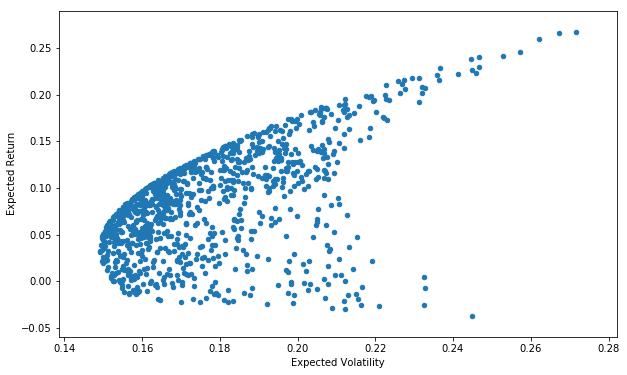

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')